PCA: Principle Component Analysis: step1 > decorrelation, step2 > reduce dimension  


1- Decorrelation:
- Rotates data samples to be aligned with axes 
- mean ~ 0

### Decorrelation

In [126]:
import pandas as pd
import numpy as np
df = pd.read_csv('Grains/seeds-width-vs-length.csv', header=None)
grains = df.to_numpy()

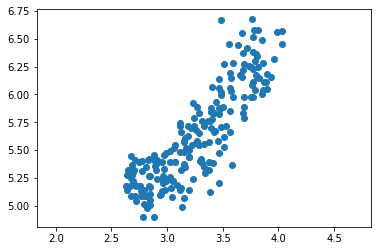

Pearson Correlation before-PCA: 0.8604149377143466


In [130]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:, 0]

# Assign the 1st column of grains: length
length = grains[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(f'Pearson Correlation before-PCA: {correlation}')


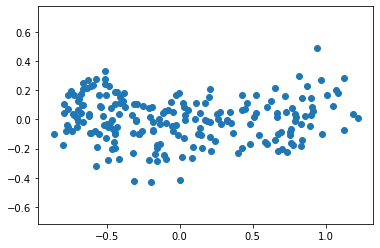

Pearson Correlation after-PCA: 2.5478751053409354e-17


In [132]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(f'Pearson Correlation after-PCA: {correlation}')

### Principal component visualized
Principle component: direction in which the sample varies the most

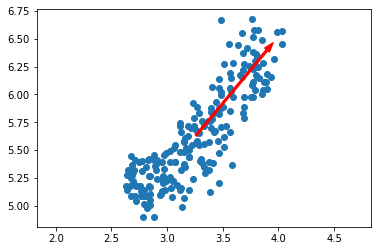

In [134]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.02)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### Intrinsic dimension
Intrinsic dimension = number of PCA features with significant variance

In [135]:
import pandas as pd
df = pd.read_csv('fish.csv', header=None) # prevent first row from becoming header
samples = df.iloc[:,1:].to_numpy()
species = df.iloc[:,0].to_numpy()

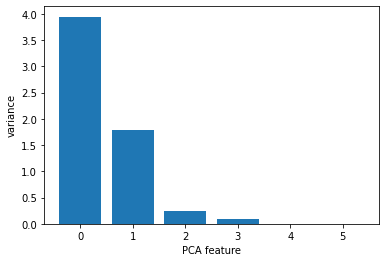

In [136]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

### Dimension reduction

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
scaled_samples = scaler.transform(samples)

In [142]:
print(f'Shape of data pre-pca: {scaled_samples.shape}')

Shape of data (85, 6)


In [145]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(f'Shape of data  post-pca:{pca_features.shape}')

Shape of data  post-pca:(85, 2)


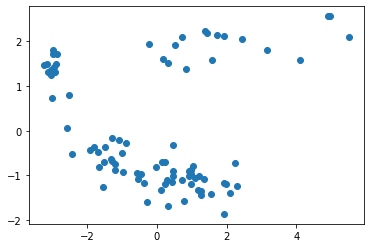

In [147]:
plt.scatter(pca_features[:,0], pca_features[:,1])
plt.show()